<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/Concoltuion_conv2transpose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


Create a transpose convolution instance

In [3]:
#create a ConvTranspose2d class instance with parameters
#parameters
inChans=3 #RGB
outChans=15
krnsize=5
stride=1
padding=0
#create the instance
c=nn.ConvTranspose2d(inChans,outChans,krnsize,stride,padding)
#let's have a look at it
print(c)
print(' ')

#check out its weight tensor: what are the dimensions?
print('Size of weights: ' +str(c.weight.shape))
print('Size of bias: ' +str(c.bias.shape))


ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


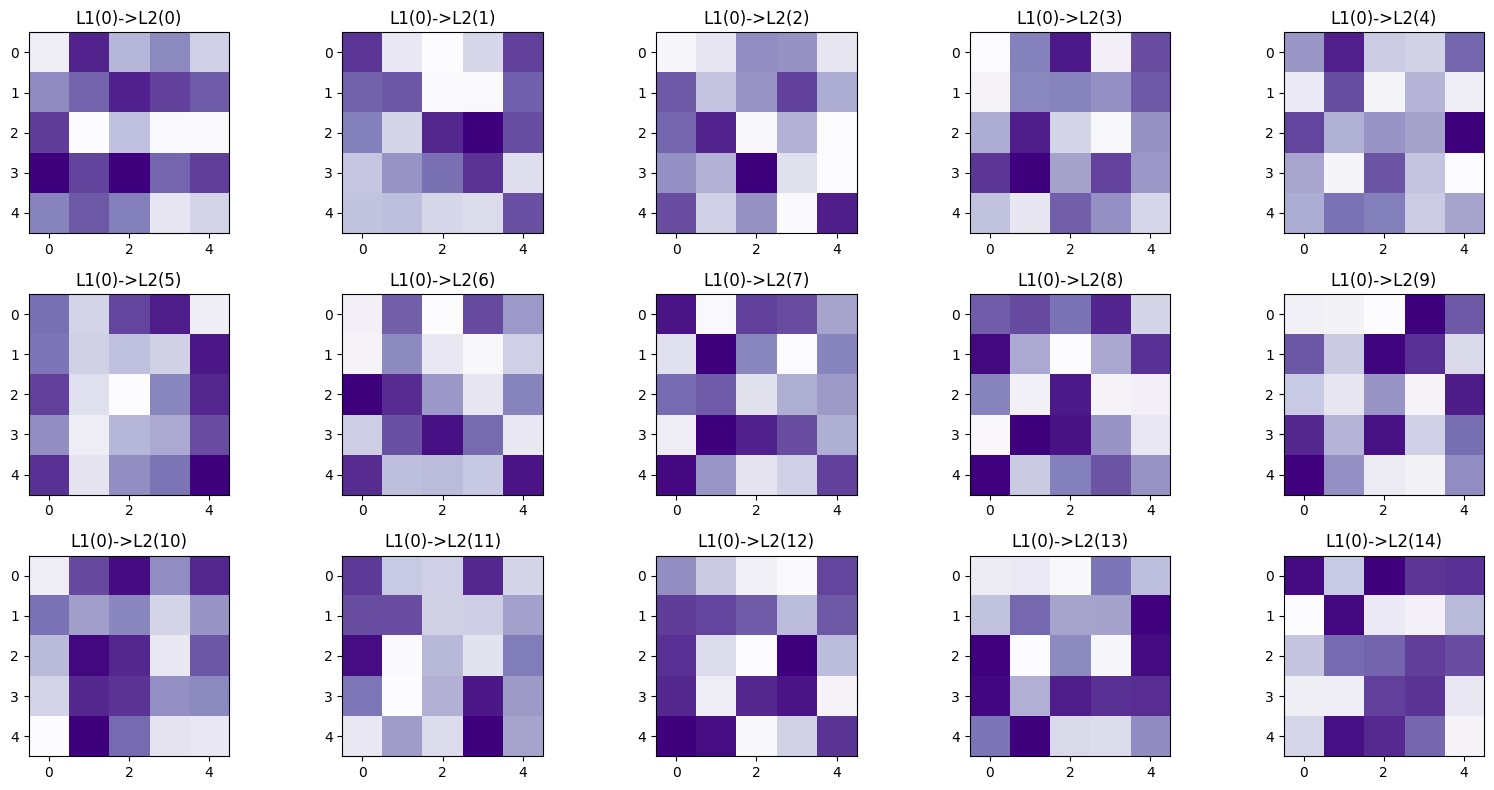

In [4]:
#what do these kernels look like?
fig, axs = plt.subplots(3, 5, figsize=(16, 8))
for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[0,i,:,:]).detach(),cmap='Purples')
  ax.set_title('L1(0)->L2(%s)'%i)
plt.tight_layout()
plt.show()


Convolve with an image

In [6]:
#size of the image(N,RGB,width,height)
imsize=(1,3,64,64)
img=torch.rand(imsize)
#pytorch wants channels first, but matplotlib wants channels last
#therefore,tensors must be permuted to visualize
img2view=img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


In [7]:
#convolve the image with filter bank(set of 'outhans' kernels)
convRes=c(img)
print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])


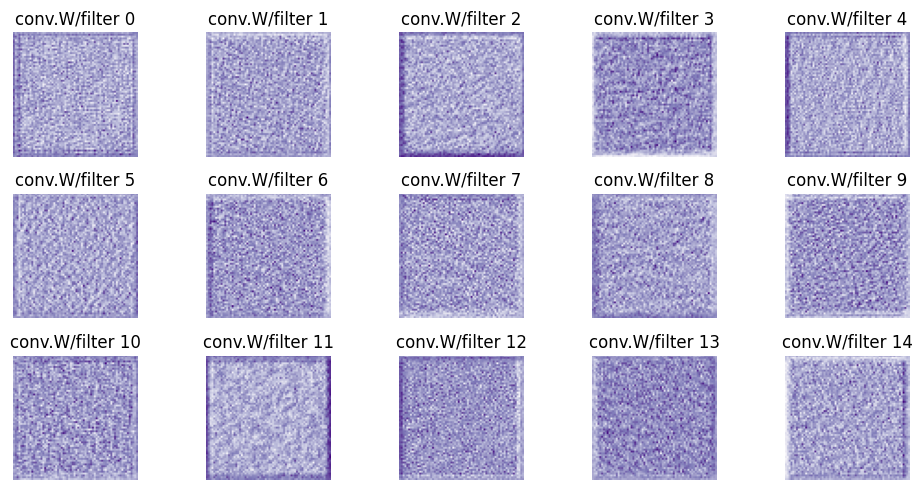

In [8]:
#What do the convolved images look like>
fig,axs=plt.subplots(3,5,figsize=(10,5))
for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(convRes[0,i,:,:]).detach(),cmap='Purples')
  ax.set_title('conv.W/filter %s'%i)
  ax.axis('off')
plt.tight_layout()
plt.show()